# TP3 - Régression logistique - Données déséquilibrées

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

## Question 1

In [2]:
#Importation des données
X, Y = pd.read_csv('Telecom_x.csv', index_col=0), pd.read_csv('Telecom_y.csv',index_col=0)

In [3]:
X.describe()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
Y.describe()

,0
count,3333.000000
mean,0.144914
std,0.352067
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


On divise les données en 80% pour l'entrainement et 20% pour le test. Cela permet d'avoir une bonne répartition entre les données d'entrainement et les données pour le test.

In [5]:
#Création des bases test et apprentissage
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
438,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1


## Question 2

In [6]:
#Régression logistique
clf = LogisticRegression(max_iter=1000).fit(X_train, Y_train.to_numpy().ravel())
Y_pred = clf.predict(X_test)

## Question 3

Plus les Odds Ratios se rapprochent de 1, moins la variable n'a d'effet significatif. \
Si > 1 alors, une augmentation de cette variable est associé à une augmentation de désabonnement. \
Si <1 alors, une augmentation de cette variable est associé à une réduction de désabonnement.

In [7]:
#Calcul des odds-ratios
odds_ratios = pd.DataFrame(np.exp(clf.coef_), columns=X.columns).T
print(odds_ratios)

                       0
VMail Message   0.976290
Day Mins        1.010580
Day Calls       1.000070
Day Charge      1.008615
Eve Mins        1.007508
Eve Calls       1.001834
Eve Charge      0.980176
Night Mins      1.002259
Night Calls     0.999206
Night Charge    0.992255
Intl Mins       1.096747
Intl Calls      0.914910
Intl Charge     1.028762
CustServ Calls  1.565303


Ainsi le service augmentant le plus les désabonnements est le CustServ Calls (augmente de 1.565 fois la probabilité de désabonnement).\
Le service qui baisse le plus la probabilité de se désabonner est Intl Calls (multiplie par 0.915 la probabilité).

## Question 4

In [8]:
#Matrice de confusion
print(pd.DataFrame(confusion_matrix(Y_test, clf.predict(X_test))))

#Accuracy score
print('Précision du modèle : ', accuracy_score(Y_test,clf.predict(X_test)))

     0  1
0  564  2
1   92  9
Précision du modèle :  0.8590704647676162


Le modèle de régression logistique qu'on vient de faire à une accuracy de 0.85. Il est assez bon. \
 Mais si on fait attention à la matrice de confusion, la classe des non-désabonnements (ligne 1 : 564 + 2 observations) est beaucoup plus représentée que la classe des desabonnements 
(ligne 2 : 92 + 9 observations). Les données sont donc déséquilibrées.

## Question 5

Le but de ces modèles va être de régler (ou de minimiser) le problème de déséquilibre. Pour mesurer ce déséquilibre, on va utiliser \
la mesure f1_score de sklearn qui est une mesure permettant d'évaluer la performance du modèle sur toutes les classes.

### Modèle de changement de seuil

Les lignes de codes suivantes permettent de trouver le meilleur seuil, c'est à dire celui qui donne le meilleur F1-score.

In [9]:
Y_prob = clf.predict_proba(X_test)[:, 1] #Récupération des probas du modèle
seuil = np.arange(0,1,0.001)
f1 = []

for s in seuil:
    #Application du seuil (Booléen -> True si supérieur à s (=>désabonnement), sinon False)
    s_pred = (Y_prob >= s).astype(int) 
    f1.append([s, f1_score(Y_test, s_pred)])

print('Seuil obtenant le meilleur F1-score : ')
df_s = pd.DataFrame(f1, columns=['Seuil','F1-score'])
best_seuil = df_s.loc[df_s['F1-score'] == df_s['F1-score'].max()]
print(best_seuil)

#Performance du modèle :
s_pred = (Y_prob >= best_seuil['Seuil'].values[0]).astype(int)

#Matrice de confusion
print('Matrice de confusion : \n', pd.DataFrame(confusion_matrix(Y_test, s_pred)))
#Accuracy score
print('Précision du modèle : ', accuracy_score(Y_test, s_pred))


Seuil obtenant le meilleur F1-score : 
     Seuil  F1-score
216  0.216  0.495868
217  0.217  0.495868
Matrice de confusion : 
      0   1
0  485  81
1   41  60
Précision du modèle :  0.8170914542728636


### Modèle de sous-échantillonnage

Cette méthode permet de mieux catégoriser les observations en supprimant les données ayant des classes différentes sont proches.

In [10]:
NM = NearMiss()
X_NM, Y_NM = NM.fit_resample(X_train, Y_train)

#Régression logistique
clf_NM = LogisticRegression(max_iter=1000).fit(X_NM, Y_NM.to_numpy().ravel())
Y_pred_NM = clf_NM.predict(X_test)

#Calcul des odds-ratios
odds_ratios_NM = pd.DataFrame(np.exp(clf_NM.coef_), columns=X.columns)
print('Odds Ratio : \n ', odds_ratios_NM.T)

#Matrice de confusion
print(pd.DataFrame(confusion_matrix(Y_test, clf_NM.predict(X_test))))

#Accuracy et F1-score score
print('Précision du modèle : ', accuracy_score(Y_test,clf_NM.predict(X_test)))
print('F1-Score : ', f1_score(Y_test, Y_pred_NM))

Odds Ratio : 
                         0
VMail Message   1.048544
Day Mins        1.014512
Day Calls       0.992493
Day Charge      0.995011
Eve Mins        1.012386
Eve Calls       0.999009
Eve Charge      0.968849
Night Mins      1.003056
Night Calls     0.994563
Night Charge    0.991356
Intl Mins       1.118568
Intl Calls      0.926573
Intl Charge     0.975415
CustServ Calls  1.659702
     0    1
0  329  237
1   25   76
Précision du modèle :  0.6071964017991005
F1-Score :  0.3671497584541063


### Modèle de sur-échantillonnage

Cette méthode permet d'obtenir plus de données minoriataires en se basant sur les précédentes observations.

In [11]:
SM = SMOTE(random_state=42)
X_SM, Y_SM = SM.fit_resample(X_train, Y_train)

#Régression logistique
clf_SM = LogisticRegression(max_iter=1000).fit(X_SM, Y_SM.to_numpy().ravel())
Y_pred_SM = clf_SM.predict(X_test)

#Calcul des odds-ratios
odds_ratios_SM = pd.DataFrame(np.exp(clf_SM.coef_), columns=X.columns)
print('Odds Ratio : \n ', odds_ratios_SM.T)

#Matrice de confusion
print(pd.DataFrame(confusion_matrix(Y_test, clf_SM.predict(X_test))))

#Accuracy score
print('Précision du modèle : ', accuracy_score(Y_test,clf_SM.predict(X_test)))

#F1-Score
print('F1-Score : ', f1_score(Y_test, Y_pred_SM))

Odds Ratio : 
                         0
VMail Message   0.977073
Day Mins        1.008093
Day Calls       0.999090
Day Charge      1.016300
Eve Mins        1.006311
Eve Calls       1.002856
Eve Charge      0.987279
Night Mins      1.003032
Night Calls     0.999534
Night Charge    0.979022
Intl Mins       1.116484
Intl Calls      0.823307
Intl Charge     1.040923
CustServ Calls  1.520457
     0    1
0  392  174
1   27   74
Précision du modèle :  0.6986506746626686
F1-Score :  0.42406876790830944


Le meilleur des 3 modèles est celui du changement de seuil. En effet, en plus d'avoir la meilleur des accuracy (0,817) il possède aussi le meilleur F1-score (0,496).

## Question 6

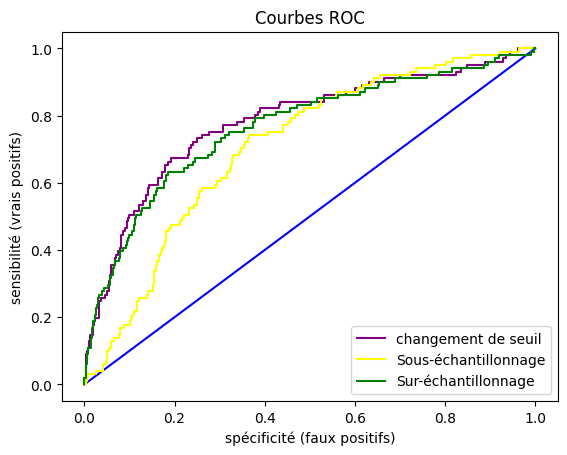

In [12]:
#Récupération des probabilités
Y_proba_NM = clf_NM.predict_proba(X_test)[:, 1]
Y_proba_SM = clf_SM.predict_proba(X_test)[:, 1]

#Calculer courbes ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob, drop_intermediate=False)
fpr_NM, tpr_NM, thresholds_NM = roc_curve(Y_test, Y_proba_NM, drop_intermediate=False)
fpr_SM, tpr_SM, thresholds_SM = roc_curve(Y_test, Y_proba_SM, drop_intermediate=False)

#Calculer l'AUC
roc_auc = roc_auc_score(Y_test, Y_prob)
roc_auc_NM = roc_auc_score(Y_test, Y_proba_NM)
roc_auc_SM = roc_auc_score(Y_test, Y_proba_SM)

#Affichage
plt.plot([0, 1], [0, 1], color='blue')
plt.xlabel('spécificité (faux positifs)')
plt.ylabel('sensibilité (vrais positifs)')
plt.title('Courbes ROC')
#Méthode de base de régression logistique
plt.plot(fpr, tpr, color='purple',label='changement de seuil')
#Méthode Sous-échantillonnage
plt.plot(fpr_NM, tpr_NM, color='yellow', label='Sous-échantillonnage')
#Méthode Sur-échantillonnage
plt.plot(fpr_SM, tpr_SM, color='green', label='Sur-échantillonnage')
plt.legend(loc='lower right')